# Population Data
### Source: World Data bank

#### Instructions:
In order to run this file, you must create a directory called '/data/population' and add these files (from google drive folder data -> population)
1. 'wrldbnk_urban_pop.csv'
2. 'wrldbnk_pop_dnst.csv'


## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import os

DATA_DIR = 'data'
POPULATION_DIR = os.path.join(DATA_DIR, 'population')

SELECTED_COUNTRIES = [
'south africa',
'kenya',
'china',
'taiwan',
'japan',
'south korea',
'india',
'pakistan',
'indonesia',
'philippines',
'singapore',
'thailand',
'canada',
'united kingdom',
'ireland',
'scotland',
'australia',
'new zealand',
'united states',
'korea, rep.']

In [2]:
def load_data_frame(file_name, path):
    """
    Loads data from specified path and returns a data frame.
    """
    file_path = os.path.join(path, file_name)
    return pd.read_csv(file_path)

def clean_worldbank_data(df):
    """
    Removes extra columns that come from worldbank data files.
    Converts all values to numeric and lowercase.
    """
    #remove unneeded columns
    df.drop(['Indicator Name', 'Indicator Code', 'Country Code'], axis=1, inplace = True)

    #replace non-numericals
    df = df.replace('..', np.NaN)

    #convert all columns of DataFrame to numeric
    df.loc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

    #convert country names to lowercase
    df['Country Name'] = df['Country Name'].str.lower()
    return df

def get_date_range(df, start_year, end_year_exclusive):
    """
    Returns a dataframe with the selected date range.
    """
    columns = df.columns
    country_index = columns.get_loc('Country Name') #make sure not to remove the country column
    start_index = columns.get_loc(start_year)
    end_index = columns.get_loc(end_year_exclusive)
    ranged_df = df.iloc[:,np.r_[country_index ,start_index : end_index]]
    return ranged_df

## Population Density - people per sq. KM of land area

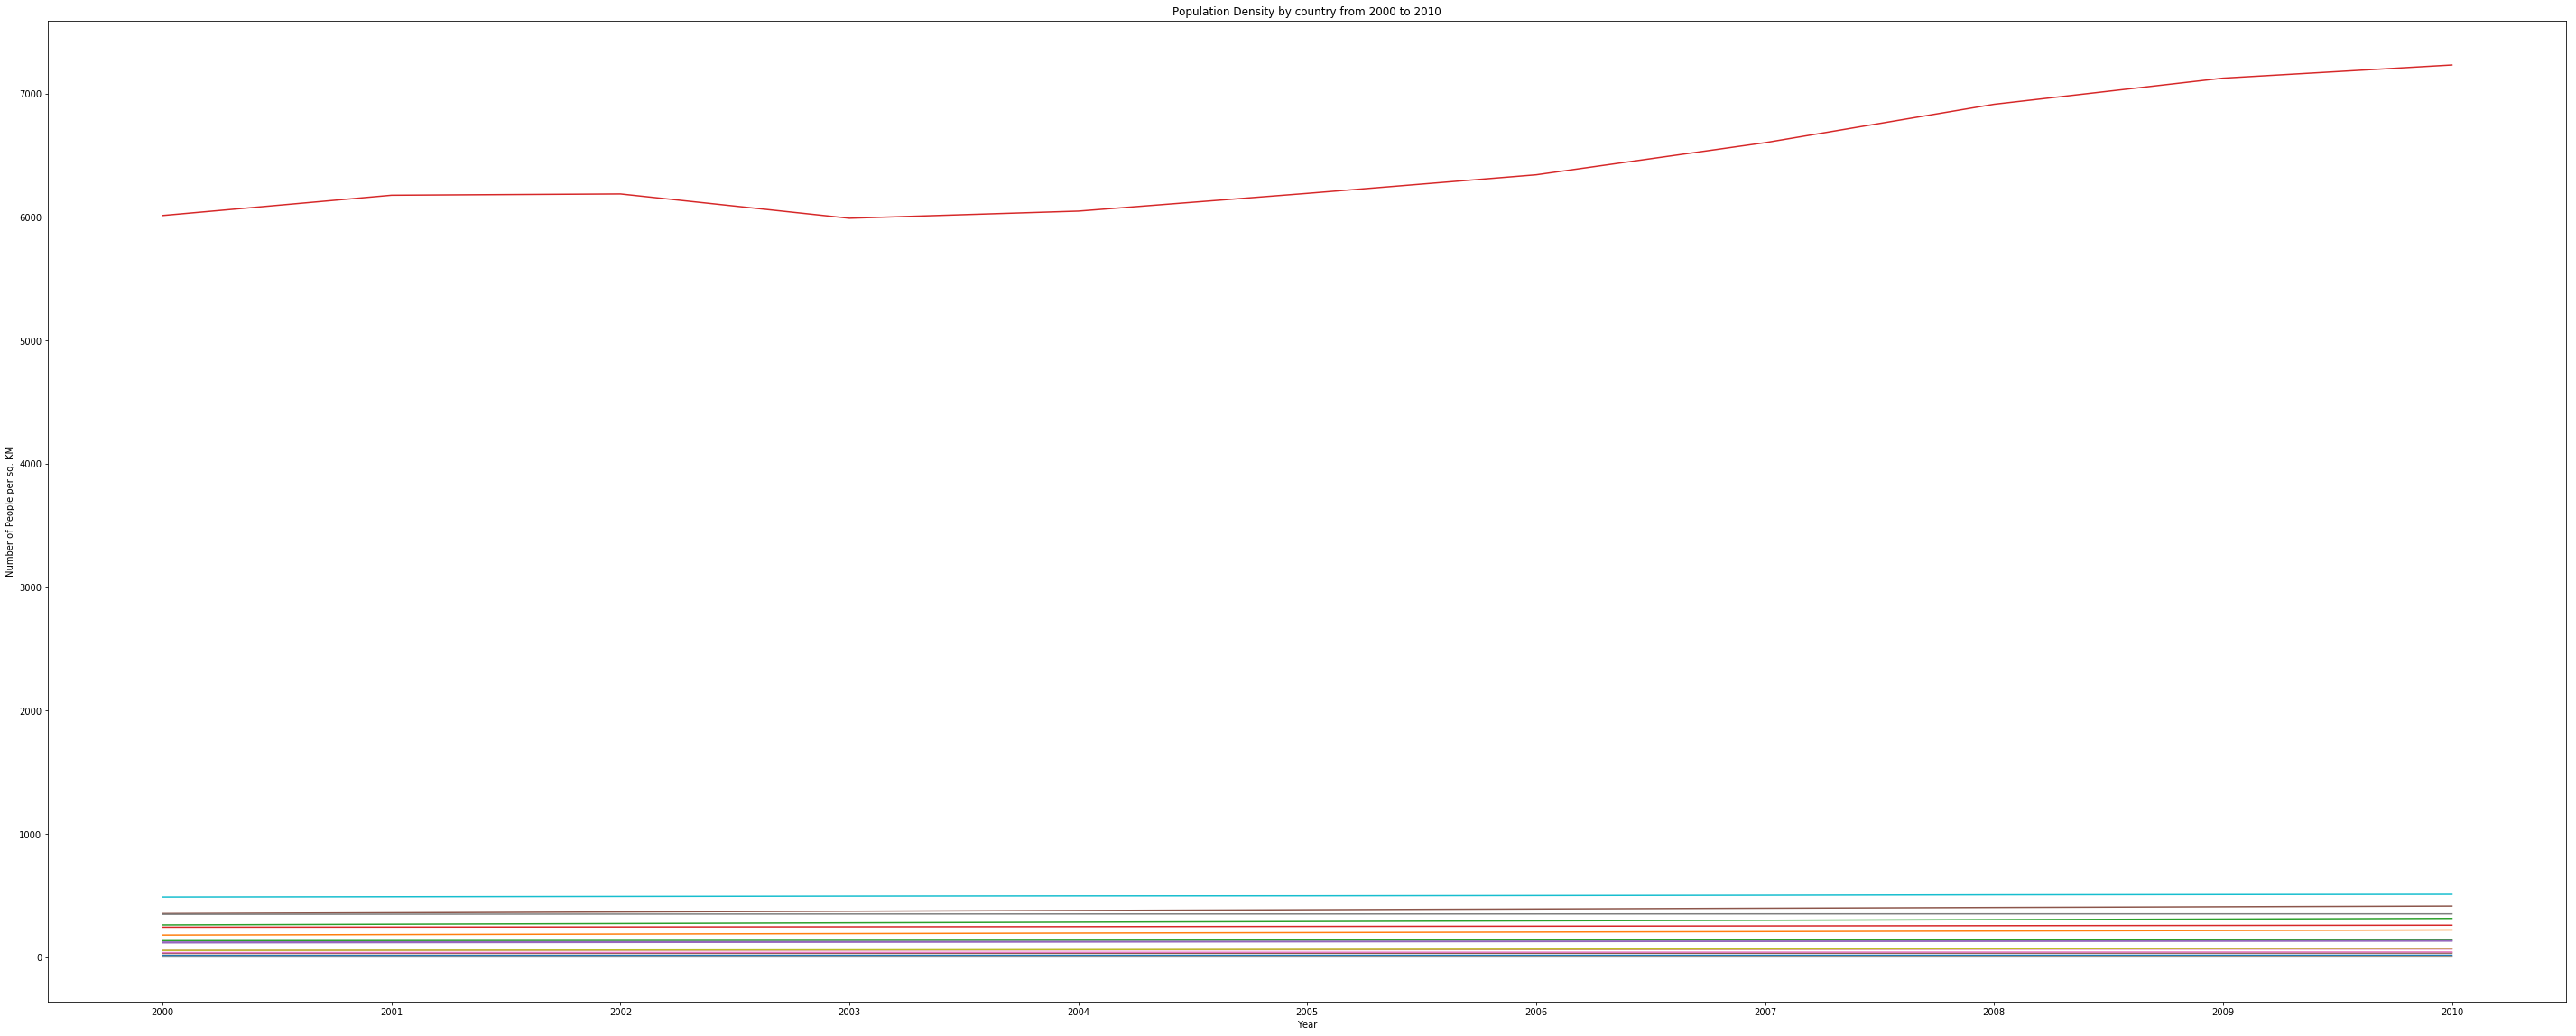

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
11,australia,2.493134,2.526978,2.558010,2.589771,2.619971,2.654778,2.694232,2.711115,2.765995,2.823594,2.867859
33,canada,3.383699,3.418031,3.448833,3.483363,3.518443,3.553303,3.581731,3.616637,3.655989,3.698085,3.739510
38,china,134.492481,135.473046,136.383781,137.235922,138.053437,138.867765,139.645345,140.376591,141.097708,141.801240,142.487740
79,united kingdom,243.427909,244.366854,245.403542,246.548907,247.955628,249.663977,251.505890,253.471926,255.474703,257.414417,259.440189
104,indonesia,116.771877,118.409171,120.066053,121.742585,123.436935,125.147099,126.872383,128.611724,130.361662,132.117709,133.875104


In [5]:
dnst_df = load_data_frame('wrldbnk_pop_dnst.csv', POPULATION_DIR)

dnst_df = clean_worldbank_data(dnst_df)

#select the countries with data from newslookup.com
filtered_df = dnst_df.loc[dnst_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
dated_df = get_date_range(filtered_df, '2000', '2011')

#transpose for graphing
dnst_t = dated_df.T

fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(1,1,1)
ax.plot(dnst_t[1:])
ax.set(title='Population Density by country from 2000 to 2010',
 ylabel='Number of People per sq. KM', xlabel='Year')
plt.show()

dated_df.head()

## Urban Population - % of population living in urban areas

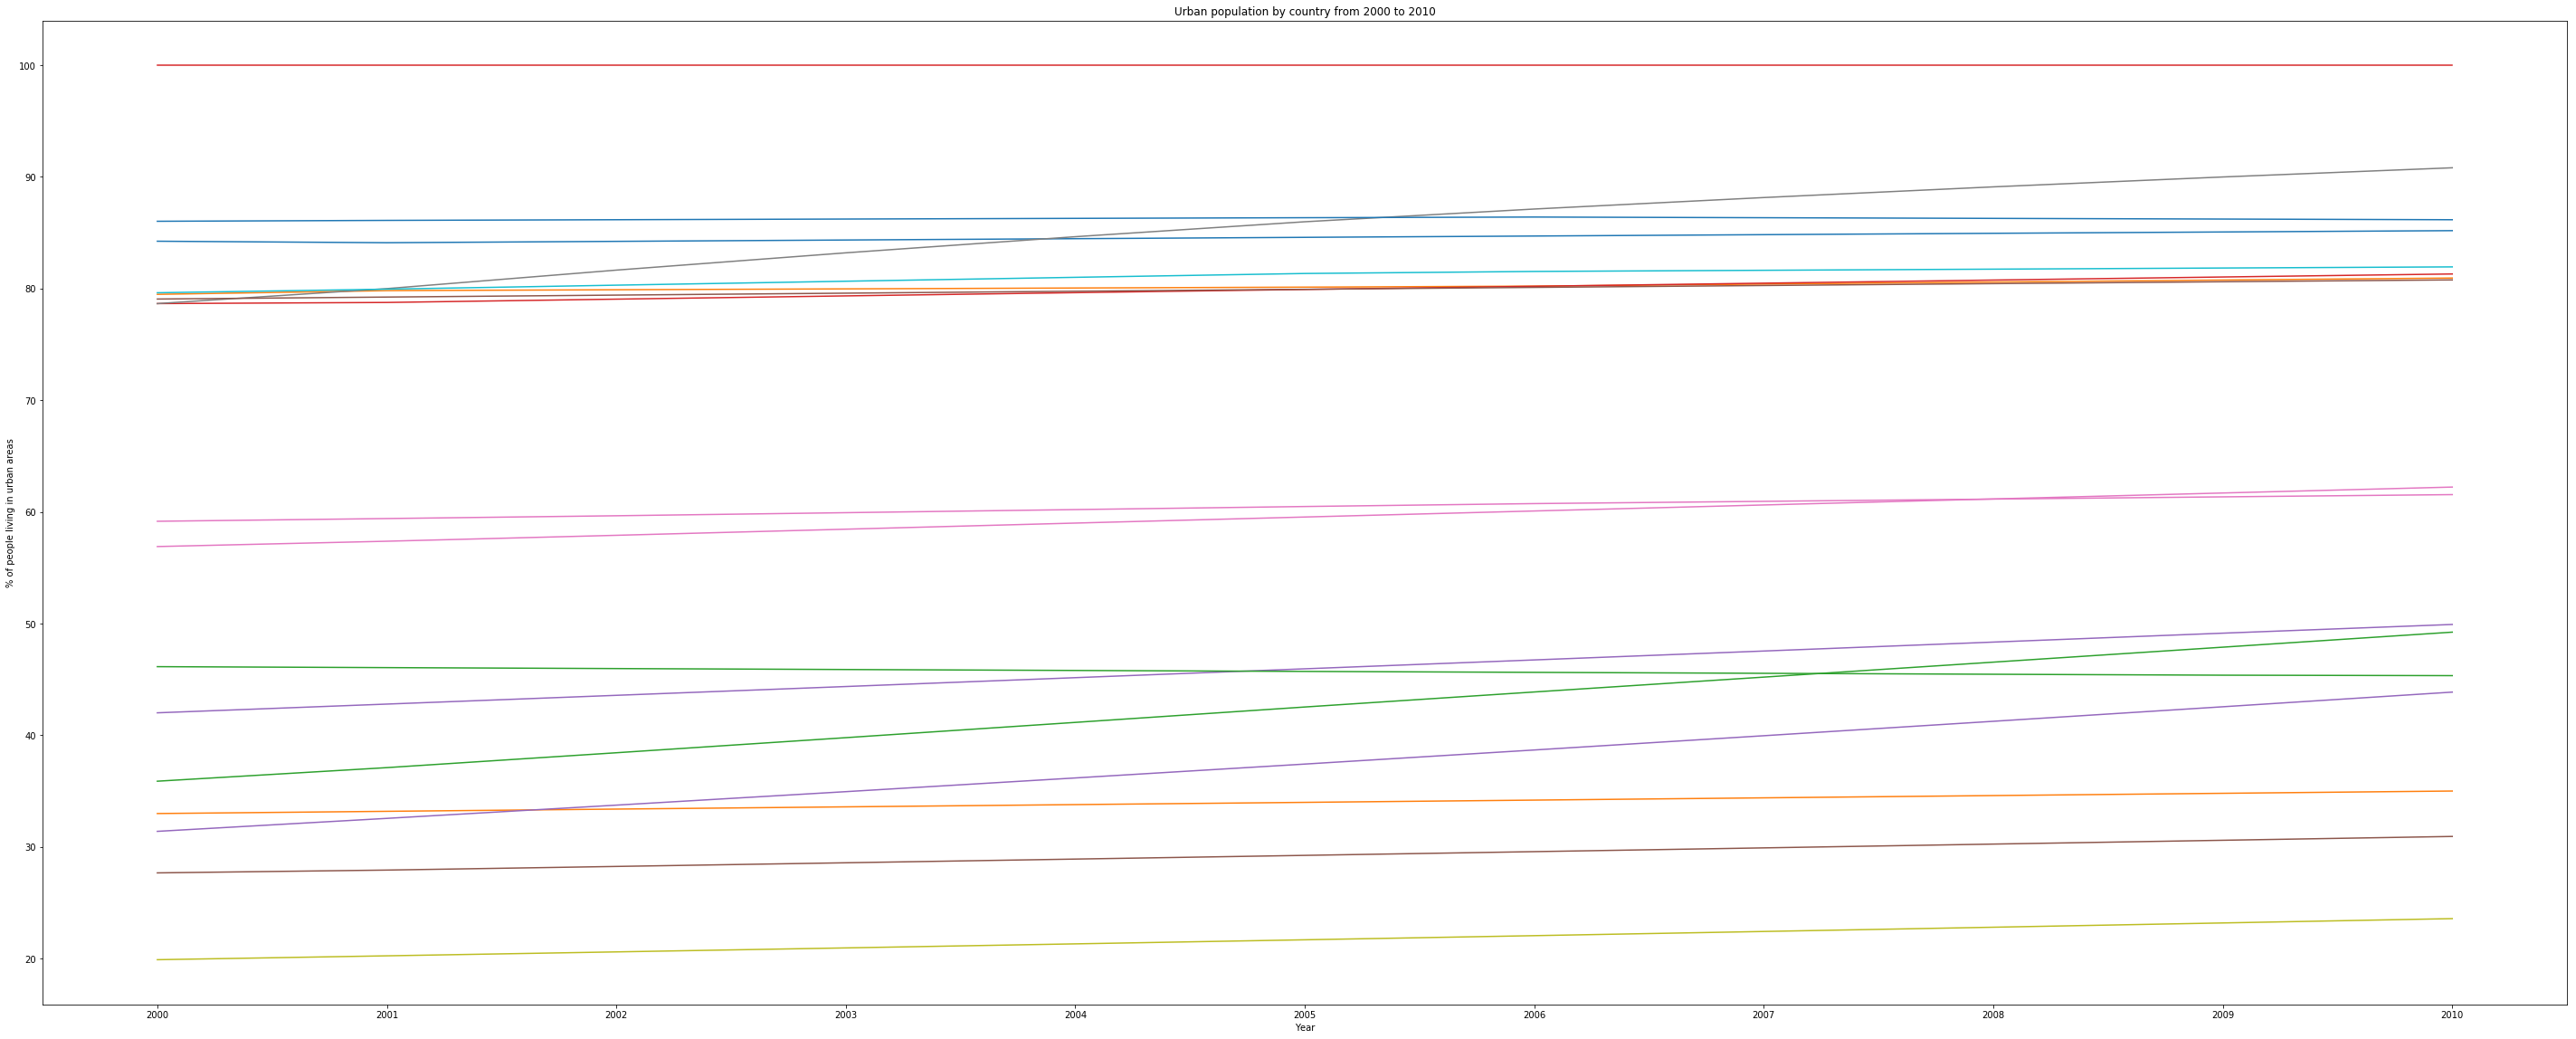

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
11,australia,84.235,84.100,84.222,84.343,84.463,84.582,84.700,84.822,84.943,85.063,85.182
33,canada,79.478,79.810,79.888,79.967,80.045,80.122,80.213,80.396,80.578,80.758,80.937
38,china,35.877,37.093,38.425,39.776,41.144,42.522,43.868,45.199,46.539,47.880,49.226
79,united kingdom,78.651,78.751,79.047,79.339,79.629,79.915,80.199,80.479,80.757,81.031,81.302
104,indonesia,42.002,42.783,43.568,44.356,45.149,45.942,46.738,47.535,48.335,49.134,49.914


In [7]:
urban_df = load_data_frame('wrldbnk_urban_pop.csv', POPULATION_DIR)

urban_df = clean_worldbank_data(urban_df)

#select the countries with data from newslookup.com
filtered_df = urban_df.loc[urban_df['Country Name'].isin(SELECTED_COUNTRIES)]

#select from years 2000-2010
dated_df = get_date_range(filtered_df, '2000', '2011')

#transpose for graphing
urban_t = dated_df.T

fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(1,1,1)
ax.plot(urban_t[1:])
ax.set(title='Urban population by country from 2000 to 2010',
 ylabel='% of people living in urban areas', xlabel='Year')
plt.show()

dated_df.head()